In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
solana = pd.read_csv('D:\\UA\\GitHub1\\REU\\csv files\\sol.csv')

In [3]:
solana.shape

(366, 9)

In [4]:
solana.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1687046400,15.84,15.31,15.65,491829.19,7678517.01,15.43,direct,NaN
1,1687132800,16.13,15.36,15.43,733133.44,11503860.10,16.10,direct,NaN
2,1687219200,16.68,15.73,16.10,1517960.76,24582953.16,16.65,direct,NaN
3,1687305600,17.41,16.57,16.65,2236078.72,37898015.32,17.24,direct,NaN
4,1687392000,17.74,16.58,17.24,1315581.03,22524007.25,16.64,direct,NaN


Text(0, 0.5, '$ Price')

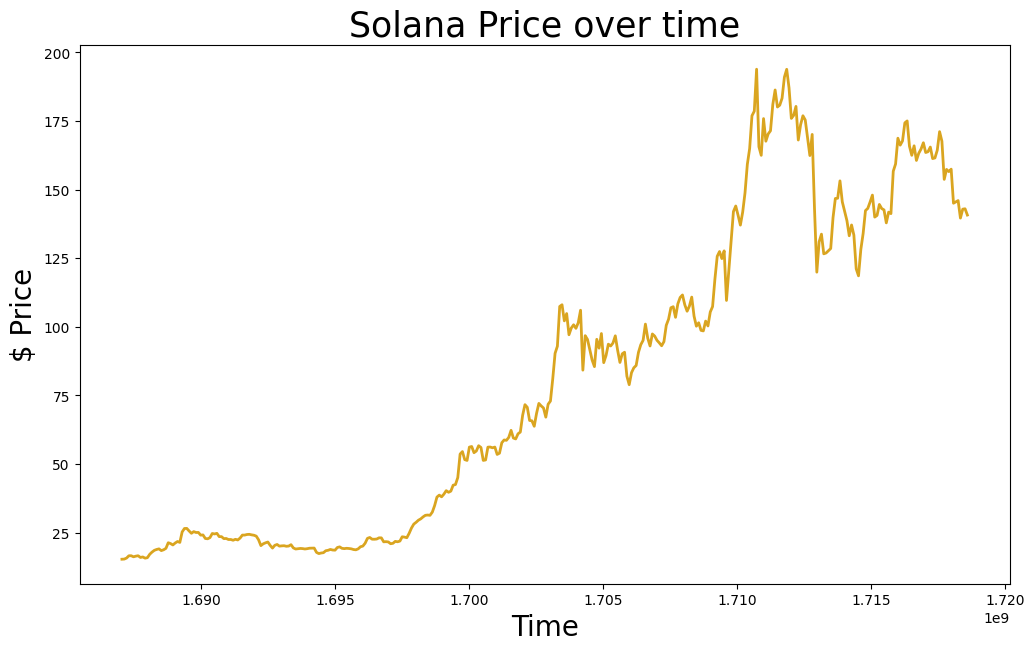

In [5]:
plt.figure(figsize = (12, 7))
plt.plot(solana["time"], solana["low"], color='goldenrod', lw=2)
plt.title("Solana Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

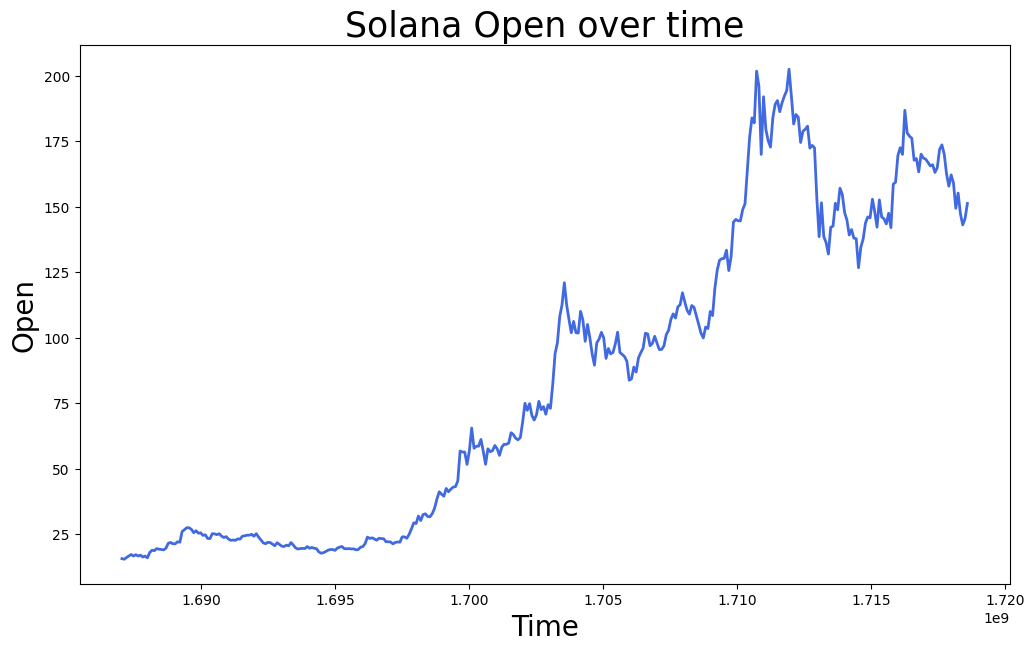

In [6]:
plt.figure(figsize = (12, 7))
plt.plot(solana["time"], solana["open"], color='royalblue', lw=2)
plt.title("Solana Open over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Open", size=20);

In [7]:
solana.isnull().sum()

time                  0
high                  0
low                   0
open                  0
volumefrom            0
volumeto              0
close                 0
conversionType        0
conversionSymbol    366
dtype: int64

In [8]:
solana['Dates'] = pd.to_datetime(solana['time'], unit='s')
solana.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,Dates
0,1687046400,15.84,15.31,15.65,491829.19,7678517.01,15.43,direct,NaN,2023-06-18
1,1687132800,16.13,15.36,15.43,733133.44,11503860.10,16.10,direct,NaN,2023-06-19
2,1687219200,16.68,15.73,16.10,1517960.76,24582953.16,16.65,direct,NaN,2023-06-20
3,1687305600,17.41,16.57,16.65,2236078.72,37898015.32,17.24,direct,NaN,2023-06-21
4,1687392000,17.74,16.58,17.24,1315581.03,22524007.25,16.64,direct,NaN,2023-06-22


In [9]:
required_features = ['open', 'high', 'low', 'volumefrom', 'volumeto', 'close']
output_label = 'close'

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
solana[required_features],
solana[output_label],
test_size = 0.3
)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
model.score(x_test, y_test)

1.0

In [13]:
future_set = solana.shift(periods=30).tail(30)

In [14]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

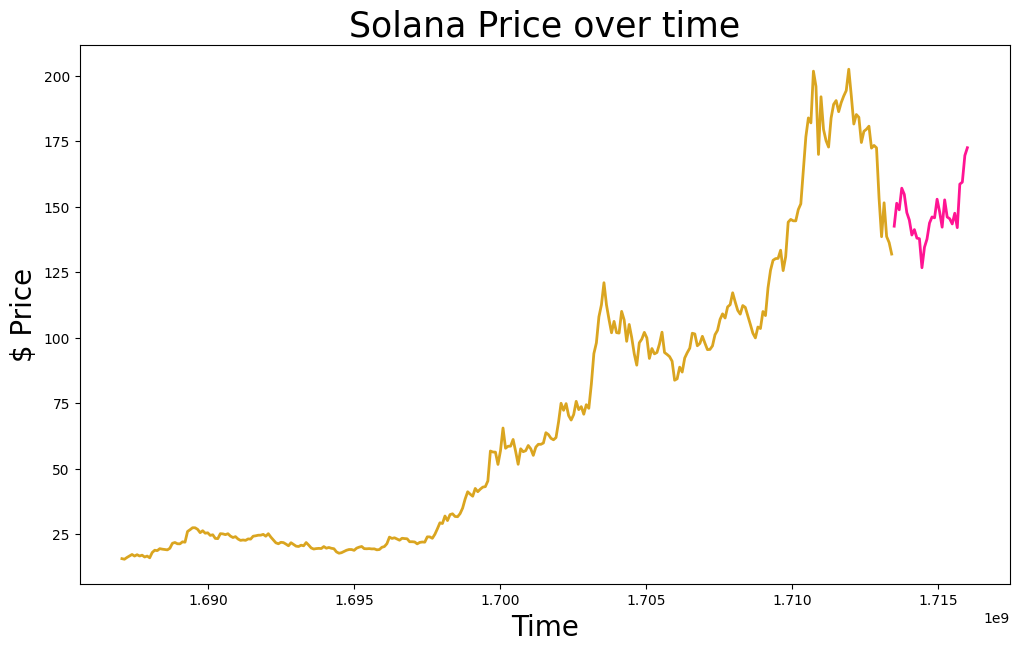

In [15]:
plt.figure(figsize = (12, 7))
plt.plot(solana["time"][-400:-60], solana["open"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["time"], prediction, color='deeppink', lw=2)
plt.title("Solana Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)